# Cleaning Data

In [1]:
##Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go

import os
import random
import warnings
from pathlib import Path


# read excel file 
df = pd.read_excel("data/masterlistmaydata.xlsx")

# delete rows with nan values
df.dropna(how='all', inplace=True) 

# Fill NaN values in the TASK column 
df['TASK'] = df['TASK'].interpolate(method ='pad', limit_direction ='forward')

# to find the dates in the TASK column
dates_in_task_col = df['TASK'].str.contains('---')

# to get indexes of the dates in the TASK column
get_idx = dates_in_task_col[dates_in_task_col == True].index 

# Fill NaN values by copying the dates in the TASK column to DATE column
df['DATE'] = df['TASK'].loc[get_idx].interpolate()

# Fill NaN values in the DATE column
df['DATE'] = df['DATE'].interpolate(method ='pad', limit_direction ='forward')

# delete if any row include nan values
df.dropna(how='any',axis=0, inplace=True)


##  fix typs of dates ##
df['TASK'] = df['TASK'].str.strip('Task:')
df['TIME FOCUSED'] = df['TIME FOCUSED'].str.strip('Min:')
df['TIME FOCUSED'] = df['TIME FOCUSED'].astype(int)
# delete ' - ' s in 'DATE' columnn

df['DATE'] = df['DATE'].str.strip(' - ')
# delete unnecessary emojies
df['TASK'] = df['TASK'].str.strip(' 📖|📈|📚|✍️|👂|🗣')
# **** #

# find values containing'2022' in DATE column
findY = df['DATE'].str.contains('2022')

# get indexes that are not containing'2022'
getFalse = findY[findY == False].index

# format dates
a = pd.to_datetime(df['DATE'].loc[getFalse], format='%d %B %a')+ pd.offsets.DateOffset(years=123) # this is because formating returns years as 1900 so it adds 123 years to the default value

# update data
df['DATE'].update(a)

# **** #

# get indexes containing'2022'
getTrue = findY[findY == True].index 

# format dates
b =  pd.to_datetime(df['DATE'].loc[getTrue], format='%d %b %Y %a')

# update data
df['DATE'].update(b)

# **** #

# show only dates not times
df['DATE'] = pd.to_datetime(df['DATE']).dt.date 

df.head(10)

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED
4,2023-05-03,DATATHON preparation,03:00:00,18:08:00,19:10:00,25,✅
5,2023-05-03,DATATHON preparation,02:00:00,17:43:00,18:08:00,25,✅
9,2023-05-03,Math 154,01:00:00,16:39:00,17:43:00,18,❌
15,2023-04-30,Math 154,04:00:00,16:13:00,16:38:00,25,✅
16,2023-04-30,Math 154,03:00:00,15:26:00,15:51:00,25,✅
17,2023-04-30,Math 154,02:00:00,15:01:00,15:26:00,25,✅
18,2023-04-30,Math 154,01:00:00,14:34:00,14:59:00,25,✅
24,2023-04-29,Math 154,16:00:00,20:46:00,21:11:00,25,✅
25,2023-04-29,Math 154,15:00:00,20:21:00,20:46:00,25,✅
26,2023-04-29,Math 154,14:00:00,19:35:00,20:11:00,25,✅


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

sns.set_theme()

warnings.filterwarnings('ignore')

CFG = {
    "plot_folder_path": Path("./plots"),
    "seed": 42,
}

if not os.path.exists(CFG["plot_folder_path"]):
    os.mkdir(CFG["plot_folder_path"])
np.random.seed(seed=CFG["seed"])
random.seed(CFG["seed"])

In [3]:
df_copy = df.copy()

df_copy.loc[df_copy['TASK'].str.contains('Ch|ch|CH'), 'TASK'] = 'PHYS 111'
df_copy.loc[df_copy['TASK'].str.contains('153'), 'TASK'] = 'MATH 153'
df_copy.loc[df_copy['TASK'].str.contains('April|March|February|Revision|Eng'), 'TASK'] = 'Eng revision'
df_copy.loc[df_copy['TASK'].str.contains('Py'), 'TASK'] = 'Python'
df_copy.loc[df_copy['TASK'].str.contains('学习中文'), 'TASK'] = 'Chinese'
time_spent = df_copy.groupby(['TASK']).sum()
time_spent.sort_values(by=['TIME FOCUSED'], ascending= False).head(10)

,TIME FOCUSED
TASK,
Math 154,2558
PHYS 111,1745
MATH 112,1692
Math 116,1630
Masterlist analysi,1144
DATATHON preselection,865
Masterlist cleaning dat,760
Eng revision,575
M154 HW - 1.1,566


In [4]:
earliest_date = df['DATE'].min()
latest_date = df['DATE'].max()

In [5]:
checklist = pd.Series(['MATH', 'PHYS','IELTS','English',
               'Drone Simulation','Habbits & Hobbies',
               '中国','game - JavaScript','College Admission', 
               'Chess-Like Game', 'Python Programming','Volunteer Works'])
checklist

0                   MATH
1                   PHYS
2                  IELTS
3                English
4       Drone Simulation
5      Habbits & Hobbies
6                     中国
7      game - JavaScript
8      College Admission
9        Chess-Like Game
10    Python Programming
11       Volunteer Works
dtype: object

In [6]:
df_copy['CHECKLIST'] = np.nan
df_copy

,DATE,TASK,NUMBER,START,END,TIME FOCUSED,COMPLETED,CHECKLIST
4,2023-05-03,DATATHON preparation,03:00:00,18:08:00,19:10:00,25,✅,NaN
5,2023-05-03,DATATHON preparation,02:00:00,17:43:00,18:08:00,25,✅,NaN
9,2023-05-03,Math 154,01:00:00,16:39:00,17:43:00,18,❌,NaN
15,2023-04-30,Math 154,04:00:00,16:13:00,16:38:00,25,✅,NaN
16,2023-04-30,Math 154,03:00:00,15:26:00,15:51:00,25,✅,NaN
...,...,...,...,...,...,...,...,...
1438,2023-01-26,House works,03:00:00,15:17:00,15:45:00,25,✅,NaN
1439,2023-01-26,House works,02:00:00,14:42:00,15:17:00,12,❌,NaN
1440,2023-01-26,House works,01:00:00,14:03:00,14:29:00,25,✅,NaN
1446,2023-01-24,Appearance,02:00:00,13:58:00,14:23:00,25,✅,NaN


In [7]:
df_copy.loc[df_copy['TASK'].str.contains('Py|Numpy|Academy'), 'CHECKLIST'] = checklist[10]


In [8]:
data = df_copy[['TIME FOCUSED', 'TASK', 'DATE']].copy()

# convert the DATE column to Timestamp objects
data['DATE'] = pd.to_datetime(data['DATE'],format='%Y %m %d ')

# Filter the dataframe by the desired date range
start_date = pd.Timestamp(input(str("type the start date like 2022-11-10 this format: "))or earliest_date )
end_date = pd.Timestamp(input(str("type the end date like 2023-01-10 this format: "))or latest_date )
data = data[(data['DATE'] >= start_date) & (data['DATE'] <= end_date)]
strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')

# Pie Chart 

## Create Data for Pie Chart 

In [9]:
pie_df = data
# Group the data by task and sum the time focused
pie_df = pie_df.groupby('TASK')['TIME FOCUSED'].sum().reset_index()
pie_df =  pie_df.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()



## Seaborn & matplotlib.pyplot codes

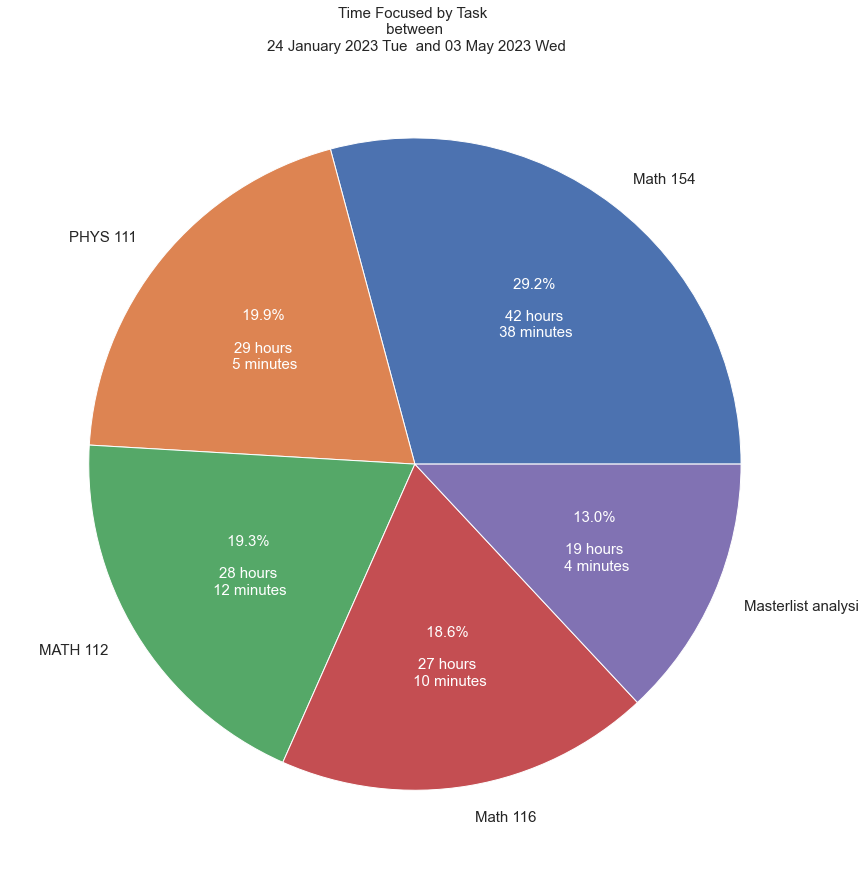

In [10]:
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(pie_df['TIME FOCUSED'], 
                                 labels=pie_df['TASK'], 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = pie_df['TIME FOCUSED'].sum()
for index, row in pie_df.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['TASK']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Time Focused by Task \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)

plt.savefig(CFG["plot_folder_path"] / f"Time Focused by Task \n between \n {strf_start_date}  and {strf_end_date}")
plt.show()

# Time focused by date 

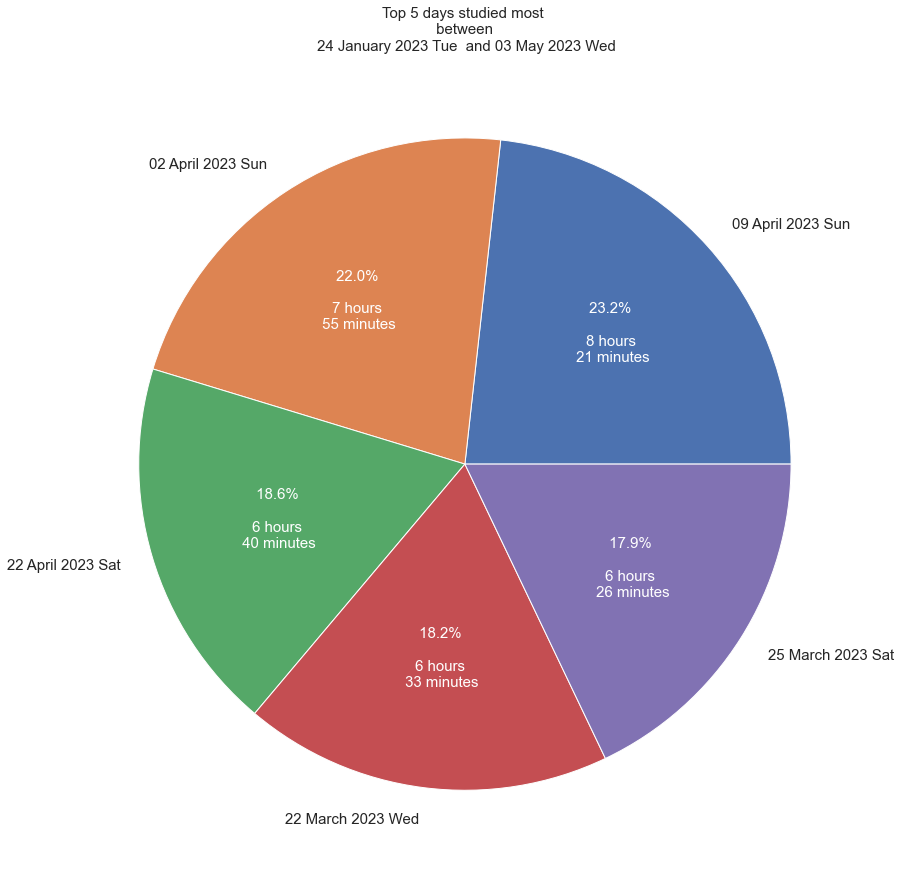

In [11]:
sort_date = data
# Group the data by task and sum the time focused
sort_date = sort_date.groupby('DATE')['TIME FOCUSED'].sum().reset_index()
sort_date =  sort_date.sort_values(by='TIME FOCUSED',ascending= False ).reset_index().head()
# sort the dataframe by Time Focused in descending order


    
# create the pie chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
wedges, labels, autopct = ax.pie(sort_date['TIME FOCUSED'], 
                                 labels=sort_date['DATE'].dt.strftime('%d %B %Y %a') , 
                                 autopct='', 
                                 textprops={'fontsize': 15})

plt.setp(autopct, color='white', fontsize=15)

# add percentage and sum values to labels
sums = sort_date['TIME FOCUSED'].sum()
for index, row in sort_date.iterrows():
    task_time = row['TIME FOCUSED']
    task_label = row['DATE']
    label = autopct[index]
    label.set_text(f" {(task_time/sums)*100:.1f}% \n\n{int(task_time//60)} hours\n {int(task_time%60)} minutes")

strf_start_date = start_date.strftime('%d %B %Y %a')
strf_end_date = end_date.strftime('%d %B %Y %a')
ax.set_title(f"Top 5 days studied most \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)

plt.savefig(CFG["plot_folder_path"] / f"Top 5 days studied most \n between \n {strf_start_date}  and {strf_end_date}")
plt.show()

### MultiIndex

In [12]:
grpdf = data
grpdf = grpdf.groupby(['DATE','TASK'])['TIME FOCUSED'].sum().reset_index()

dates = grpdf['DATE']
tasks = grpdf['TASK']
times = grpdf['TIME FOCUSED'].values

arrays= [
    dates.to_numpy(),
    tasks.to_numpy(),
        ]
index = pd.MultiIndex.from_arrays(arrays,
                                  names=["date","task"])
dtf = pd.Series(times,index=index)
grpdf


,DATE,TASK,TIME FOCUSED
0,2023-01-24,Appearance,50
1,2023-01-26,Appearance,75
2,2023-01-26,House works,62
3,2023-01-28,Math 154,50
4,2023-01-29,Appearance,125
...,...,...,...
196,2023-04-28,Recit math 154,50
197,2023-04-29,Math 154,379
198,2023-04-30,Math 154,100
199,2023-05-03,DATATHON preparation,50


In [13]:
dtf

date        task                
2023-01-24  Appearance               50
2023-01-26  Appearance               75
            House works              62
2023-01-28  Math 154                 50
2023-01-29  Appearance              125
                                   ... 
2023-04-28  Recit math 154           50
2023-04-29  Math 154                379
2023-04-30  Math 154                100
2023-05-03  DATATHON preparation     50
            Math 154                 18
Length: 201, dtype: int64

Unstack

In [14]:
unstacked_df = dtf.unstack()

unstacked_df =unstacked_df.fillna(0)
unstacked_df




task,ActivityIndicator,Algorithm,Appearance,Application,Avatar,Binary tree,Button,CV,Card,CountryPickerModal,DATATHON preparation,DATATHON preselection,Dialog,Diary,Divider,Eng revision,Form,Header,House works,Icon,IconButton,Jupyter edit,Kaggle,KeyboardAwareView,Layout,Leet code algorithm,Leet code day 1,List,M116 LESSON,M116 lessons revison,M154 HW - 1.1,M154 HW-2,MATH 112,Masterlist analysi,Masterlist cleaning dat,Math 116,Math 154,Math questiıon,Menu,Modal,New term preparation,PHYS 111,Pandas,RadioButton,Recit math 154,Rl implement deneme,Segmented Buttons,SnackBar,Typography,Worldometer,generalll,github,notion,problem,setup,zehrakaya.dev
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-24,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-26,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-29,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0
2023-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-02-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,175.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


## seaborn bar chart


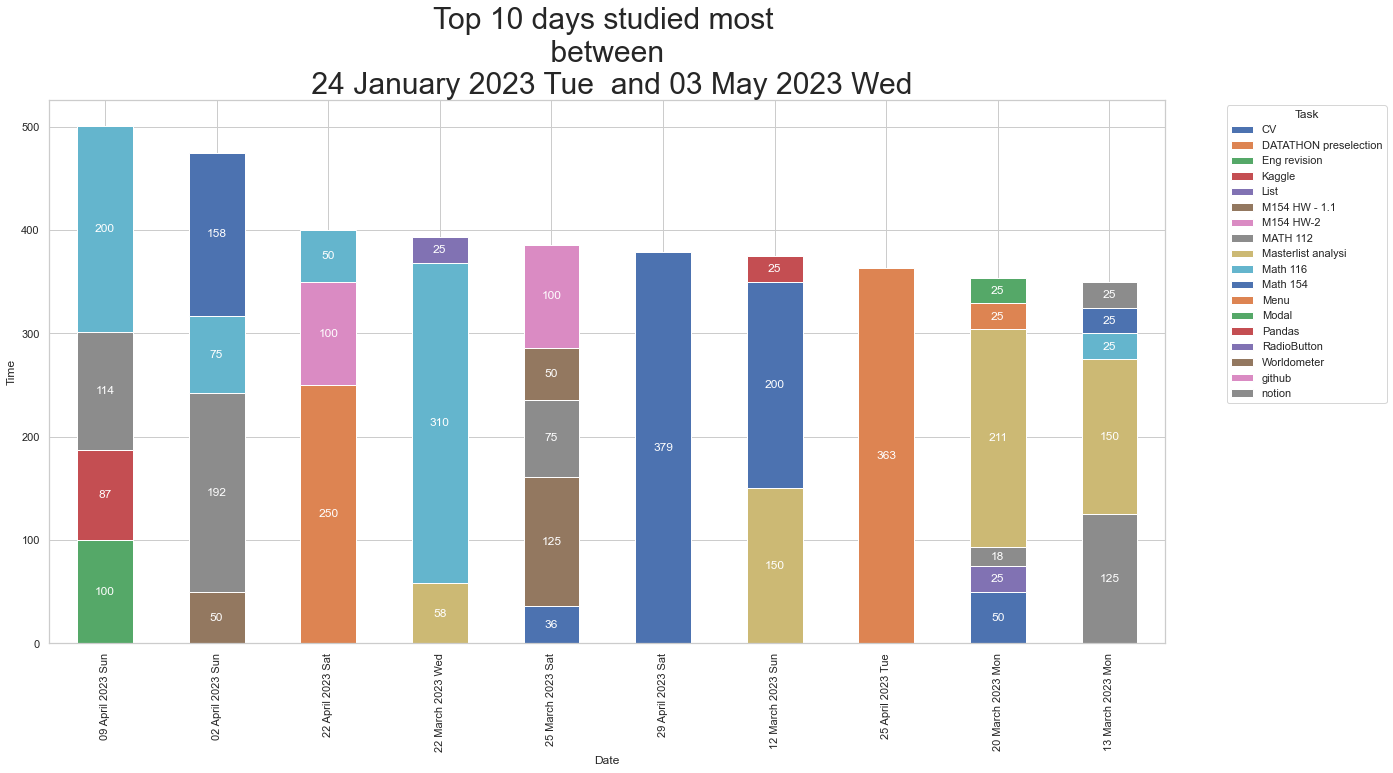

In [15]:

sns_df = unstacked_df
top_days = input() or 10

max_dates = sns_df.sum(axis=1).nlargest(top_days).index
get_max = sns_df.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
get_max.index = get_max.index.strftime('%d %B %Y %a')
sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(20, 10))
ax.set_xlabel('Date')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

for patch in ax.patches:
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    value = f"{patch.get_height():.0f}"
    if patch.get_height() != 0:
        ax.text(x, y, value, ha='center', va='center', color='white')
ax.set_title(f"Top {len(max_dates)} days studied most \n between \n {strf_start_date}  and {strf_end_date}",fontsize=30)
plt.savefig(CFG["plot_folder_path"] / f"Top {len(max_dates)} days studied most \n between \n {strf_start_date}  and {strf_end_date}")

plt.show()


add column 


In [16]:

unstacked_df['total'] =  unstacked_df.sum(axis=1)

cols = unstacked_df.columns.tolist()

cols = [cols[-1]] + cols[:-1]
unstacked_df = unstacked_df[cols]
unstacked_df.head(30)
unstacked_df = unstacked_df.groupby(['total time'],
                                  level='date').sum()
unstacked_df= unstacked_df.sort_values(by='total',
                                       ascending= False ).reset_index().head(5)
unstacked_df

task,date,total,ActivityIndicator,Algorithm,Appearance,Application,Avatar,Binary tree,Button,CV,Card,CountryPickerModal,DATATHON preparation,DATATHON preselection,Dialog,Diary,Divider,Eng revision,Form,Header,House works,Icon,IconButton,Jupyter edit,Kaggle,KeyboardAwareView,Layout,Leet code algorithm,Leet code day 1,List,M116 LESSON,M116 lessons revison,M154 HW - 1.1,M154 HW-2,MATH 112,Masterlist analysi,Masterlist cleaning dat,Math 116,Math 154,Math questiıon,Menu,Modal,New term preparation,PHYS 111,Pandas,RadioButton,Recit math 154,Rl implement deneme,Segmented Buttons,SnackBar,Typography,Worldometer,generalll,github,notion,problem,setup,zehrakaya.dev
0,2023-04-09,501.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-04-02,475.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,192.0,0.0,0.0,75.0,158.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023-04-22,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023-03-22,393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.0,0.0,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023-03-25,386.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,125.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,0.0,100.0,0.0,0.0,0.0,0.0


## classifying by day name 


In [17]:
days_df = data 
days_df['DATE'] = days_df['DATE'].dt.day_name()


In [18]:
days_df= days_df.groupby(['DATE','TASK'])['TIME FOCUSED'].sum()

In [19]:
days_df.head(10)

DATE    TASK                 
Friday  Binary tree               53
        DATATHON preselection    102
        Dialog                    50
        Eng revision             100
        MATH 112                 251
        Masterlist analysi       250
        Math 116                 161
        Math 154                 466
        Math questiıon            25
        PHYS 111                 175
Name: TIME FOCUSED, dtype: int64

In [20]:
days_sns = days_df.unstack().fillna(0)

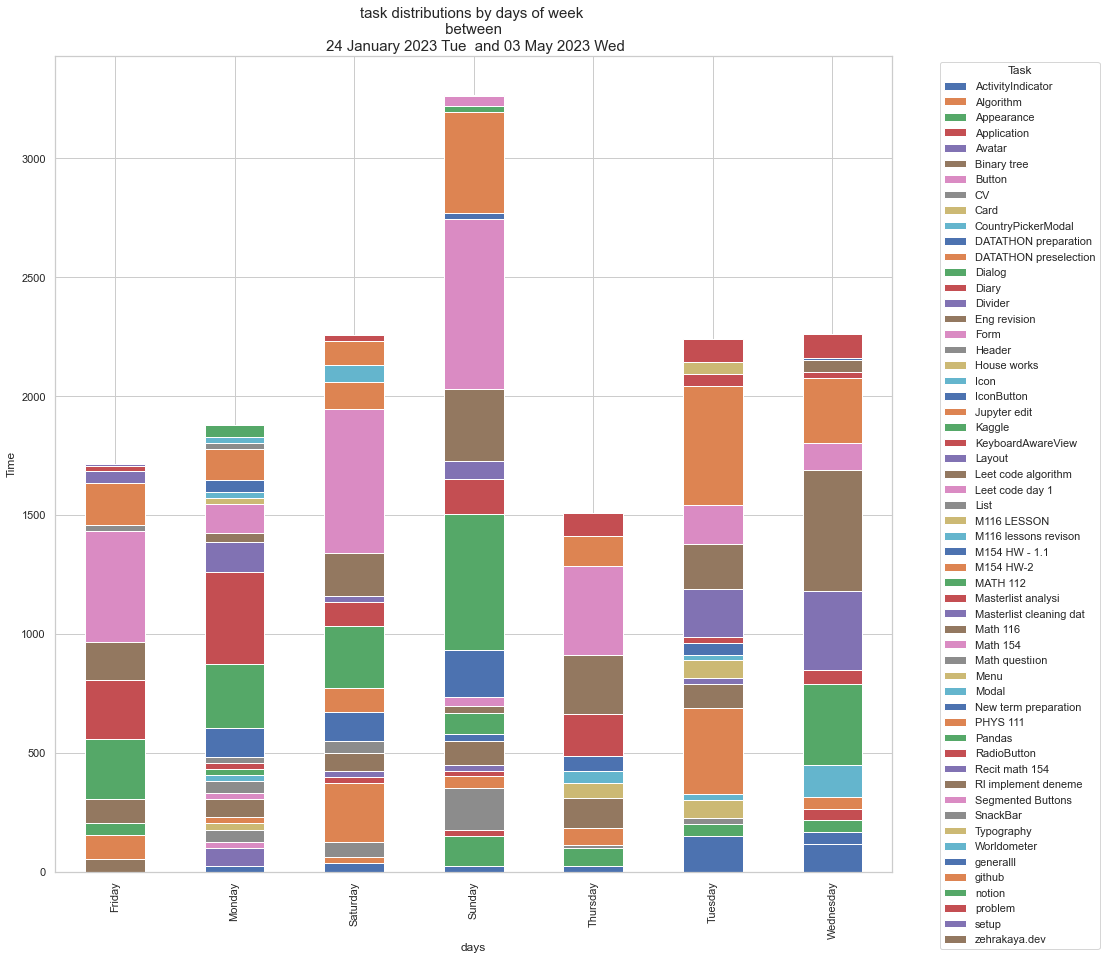

In [21]:
max_dates = days_sns.sum(axis=1).index

get_max = days_sns.loc[max_dates]

# get nonzero columns
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]
#get_max.index = get_max.index.strftime('%d %B %Y %a')

sns.set(style='whitegrid')

ax = get_max.plot(kind='bar', stacked=True, figsize=(15, 15))
ax.set_xlabel('days')
ax.set_ylabel('Time')
ax.legend(title='Task', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add values on each bar
# for patch in ax.patches:
#     x = patch.get_x() + patch.get_width() / 2
#     y = patch.get_y() + patch.get_height() / 2
#     value = f"{patch.get_height():.0f}"
#     if patch.get_height() != 0:
#         ax.text( x,y, value, ha='center', va='center', color='white')

ax.set_title(f"task distributions by days of week \n between \n {strf_start_date}  and {strf_end_date}",
             fontsize=15)
plt.savefig(CFG["plot_folder_path"] / f"task distributions by days of week \n between \n {strf_start_date}  and {strf_end_date}")

plt.show()

In [22]:


max_dates = days_sns.sum(axis=1).index
get_max = days_sns.loc[max_dates]
get_max = get_max.loc[:, (get_max != 0).any(axis=0)]

fig = go.Figure(data=[go.Bar(x=get_max.index, y=get_max[col], name=col) for col in get_max.columns])
fig.update_layout(barmode='stack', xaxis_title='Days', yaxis_title='Time',
                  title=f"Task distributions by days of week between {strf_start_date} and {strf_end_date}")
fig.update_layout(hovermode='x unified')
plt.savefig(CFG["plot_folder_path"] / f"Task distributions by days of week between {strf_start_date} and {strf_end_date}")
fig.show()

<Figure size 432x288 with 0 Axes>